In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('float_format', '{:0.3f}'.format)

In [46]:
houses_df = pd.read_csv(r'kc_house_data.csv')

houses_df['living_price'] = houses_df['price'] / houses_df['sqft_living']
houses_df['lot_price'] = houses_df['price'] / houses_df['sqft_lot']

np.std(houses_df['bathrooms'], ddof=1)

0.770163157217742

In [29]:
houses_filter1 = houses_df.filter(['price', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'yr_built', 'living_price', 'lot_price', 'grade'])
houses_filter1.corr()

,price,bedrooms,bathrooms,floors,view,condition,yr_built,living_price,lot_price,grade
price,1.000,0.308,0.525,0.257,0.397,0.036,0.054,0.555,0.308,0.667
bedrooms,0.308,1.000,0.516,0.175,0.080,0.028,0.154,-0.206,-0.062,0.357
bathrooms,0.525,0.516,1.000,0.501,0.188,-0.125,0.506,-0.091,0.202,0.665
floors,0.257,0.175,0.501,1.000,0.029,-0.264,0.489,0.004,0.478,0.458
view,0.397,0.080,0.188,0.029,1.000,0.046,-0.053,0.221,0.079,0.251
condition,0.036,0.028,-0.125,-0.264,0.046,1.000,-0.361,0.102,-0.086,-0.145
yr_built,0.054,0.154,0.506,0.489,-0.053,-0.361,1.000,-0.290,0.125,0.447
living_price,0.555,-0.206,-0.091,0.004,0.221,0.102,-0.290,1.000,0.450,0.123
lot_price,0.308,-0.062,0.202,0.478,0.079,-0.086,0.125,0.450,1.000,0.218
grade,0.667,0.357,0.665,0.458,0.251,-0.145,0.447,0.123,0.218,1.000


In [5]:
m_by_grade = pd.DataFrame()
for i in range(1, 13 + 1):
    m_by_grade[f'{i}'] = np.mean(houses_filter1[houses_df['grade'] == i])

m_by_grade

C:\Users\Lucas Munhoz\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Lucas Munhoz\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Lucas Munhoz\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Lucas Munhoz\lib\site-packages\

,1,2,3,4,5,6,7,8,9,10,11,12,13
price,142000.000,NaN,205666.667,214381.034,248523.971,301919.637,402590.262,542852.766,773513.186,1071771.074,1496841.727,2191222.000,3709615.385
bedrooms,0.000,NaN,1.000,1.483,2.388,2.686,3.256,3.480,3.773,3.907,4.160,4.222,4.846
bathrooms,0.000,NaN,0.250,0.905,1.114,1.243,1.829,2.348,2.664,3.006,3.502,3.981,5.096
floors,1.000,NaN,1.000,1.034,1.087,1.109,1.297,1.668,1.849,1.893,1.961,1.950,1.962
view,0.000,NaN,0.000,0.138,0.136,0.093,0.100,0.247,0.429,0.654,1.030,1.622,1.846
condition,1.000,NaN,3.333,3.103,3.492,3.540,3.491,3.355,3.266,3.233,3.195,3.211,3.154
yr_built,1963.000,NaN,1945.333,1939.138,1935.455,1942.471,1963.627,1980.400,1988.419,1989.570,1992.145,1992.378,1976.615
living_price,489.655,NaN,360.818,362.381,278.934,270.992,251.902,258.087,275.767,307.589,342.250,401.854,483.650
lot_price,6.802,NaN,11.113,26.450,35.438,48.601,71.489,113.892,115.660,107.043,115.635,102.812,157.085
grade,1.000,NaN,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000,13.000


In [6]:
best_means = pd.DataFrame(np.mean(m_by_grade.T.loc['9':, :]))
best_means = best_means.T

best_means1 = pd.DataFrame(np.mean(m_by_grade.T.loc['7':, :]))
best_means1 = best_means1.T

C:\Users\Lucas Munhoz\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [7]:
best_means

,price,bedrooms,bathrooms,floors,view,condition,yr_built,living_price,lot_price,grade
0,1848592.674,4.182,3.650,1.923,1.116,3.212,1987.825,362.222,119.647,11.000


In [8]:
best_means1

,price,bedrooms,bathrooms,floors,view,condition,yr_built,living_price,lot_price,grade
0,1455486.628,3.949,3.204,1.797,0.847,3.272,1983.308,331.586,111.945,10.000


In [9]:
houses_df[
    (houses_df['price'] <= best_means['price'][0]) &
    (houses_df['bedrooms'] >= best_means['bedrooms'][0]) &
    (houses_df['bathrooms'] >= best_means['bathrooms'][0]) &
    (houses_df['floors'] >= best_means['floors'][0]) &
    (houses_df['condition'] >= best_means['condition'][0]) &
    (houses_df['view'] >= best_means['view'][0]) &
    (houses_df['living_price'] <= best_means['living_price'][0]) &
    (houses_df['lot_price'] >= best_means['lot_price'][0])
]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,living_price,lot_price
4255,913000315,20140605T000000,1300000.000,6,4.500,3902,3880,3.000,0,4,...,1120,1977,0,98116,47.584,-122.399,1100,3870,333.162,335.052
7668,6169900580,20140709T000000,1465000.000,6,4.500,4230,6420,2.000,0,3,...,1870,1916,0,98119,47.630,-122.369,3450,4085,346.336,228.193


In [10]:
houses_df[
    (houses_df['price'] <= best_means1['price'][0]) &
    (houses_df['bedrooms'] >= best_means1['bedrooms'][0]) &
    (houses_df['bathrooms'] >= best_means1['bathrooms'][0]) &
    (houses_df['floors'] >= best_means1['floors'][0]) &
    (houses_df['condition'] >= best_means1['condition'][0]) &
    (houses_df['view'] >= best_means1['view'][0]) &
    (houses_df['living_price'] <= best_means1['living_price'][0]) &
    (houses_df['lot_price'] >= best_means1['lot_price'][0])
    ]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,living_price,lot_price
3615,3426049031,20140617T000000,870000.000,4,4.250,3010,4887,2.000,0,3,...,1070,1951,1996,98115,47.693,-122.272,2540,9375,289.037,178.023
5747,2771104830,20140611T000000,800000.000,4,3.750,2690,4000,2.000,0,3,...,570,1909,1989,98119,47.642,-122.372,2830,4000,297.398,200.000
17513,1370802455,20140813T000000,1050000.000,4,4.500,3180,4606,2.000,0,3,...,1190,1929,0,98199,47.640,-122.405,2110,5323,330.189,227.964
19562,3271800910,20140701T000000,1356920.000,4,3.500,4270,5800,2.000,0,3,...,1100,1937,0,98199,47.647,-122.411,3100,5800,317.780,233.952


## Essa coluna, serve para visualização do mapa de calor da localização das casas ##

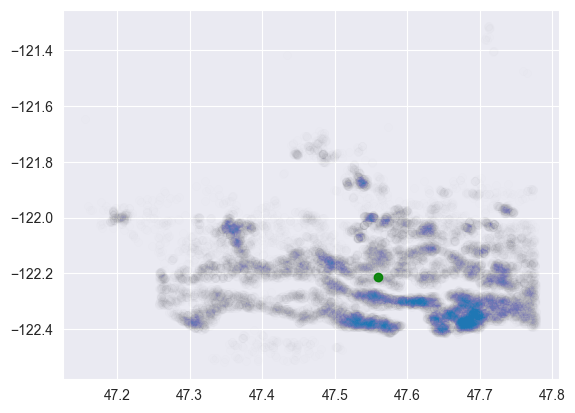

In [11]:
ymean=float(np.mean(houses_df['long']))
xmean=float(np.mean(houses_df['lat']))

fig = plt.figure()
plt.subplots_adjust()
plot1 = fig.add_subplot(1, 1, 1)

plot1.scatter(x=houses_df['lat'], y=houses_df['long'], alpha=0.003)
plot1.scatter(x=xmean, y=ymean, alpha=0.9, c='g')


# Correlações "Grade" x "Data"

In [12]:
labels = ['price', 'bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'yr_built', 'living_price', 'lot_price', 'grade']
correlations = list()

for i in labels:
    correlations.append(
        float(np.corrcoef(houses_filter1['grade'], houses_filter1[i])[0][1])
    )

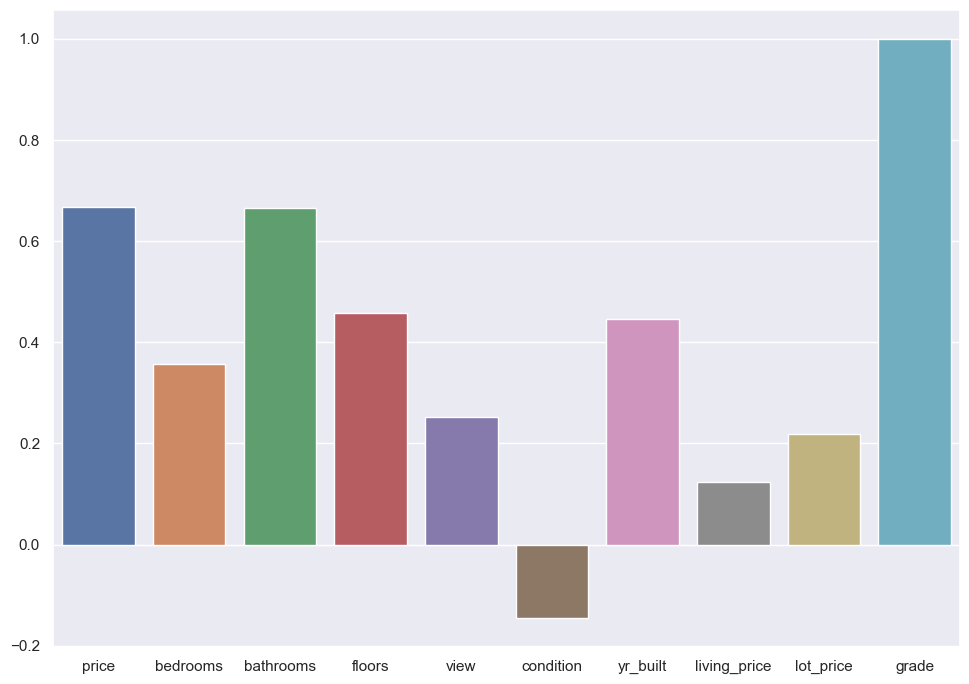

In [28]:
sns.barplot(x=labels, y=correlations)
sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(11.7,8.27)})